# Clasificación de pacientes con o sin diabetes mediante un modelo de árbol de decisión (Decision Tree)

Elaborado por: **Gabriel Armando Landín Alvarado**

## ¿Qué es un árbol de decisión?

Un árbol de decisión en machine learning es un modelo predictivo que se utiliza para tomar decisiones basadas en datos. Se estructura como un árbol, donde cada nodo interno representa una prueba o condición sobre un atributo, cada rama representa el resultado de la prueba, y cada nodo hoja representa una etiqueta de clase (en clasificación) o un valor continuo (en regresión). El objetivo es dividir el conjunto de datos en subconjuntos homogéneos en términos de la variable objetivo. El algoritmo más comúnmente utilizado para construir árboles de decisión es el CART (Classification and Regression Trees) [1](https://www.codificandobits.com/blog/clasificacion-arboles-decision-algoritmo-cart/). Su estructura es similar a un diagrama de flujo, donde:

- **Nodo raíz**: Es el punto de inicio del árbol.
- **Nodos internos**: Representan decisiones basadas en características o atributos de los datos.
- **Ramas**: Indican las posibles decisiones o caminos a seguir.
- **Nodos hoja**: Representan los resultados finales o las predicciones.

El árbol se construye dividiendo recursivamente el conjunto de datos en subconjuntos más pequeños utilizando criterios como la ganancia de información o la impureza. Este proceso continúa hasta que los nodos hoja contienen datos homogéneos o hasta que se alcanza un criterio de parada [2](https://www.ibm.com/es-es/topics/decision-trees) [3](https://machinelearningparatodos.com/arboles-de-decision-en-python/). 

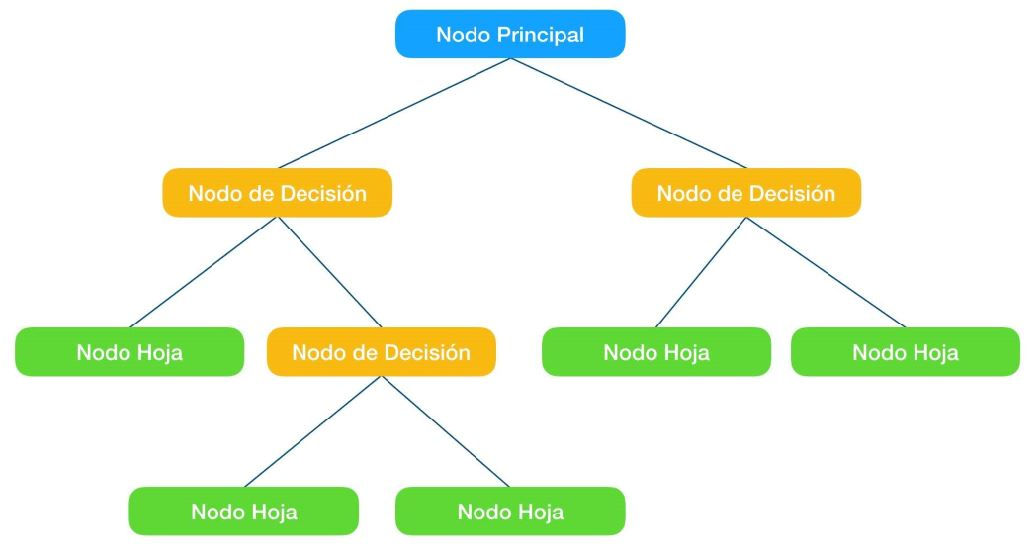

Un concepto clave en el uso de este algoritmo es el de entropía, podría decirse que es una medida de la cantidad de desorden o incertidumbre en un conjunto de datos. Se utiliza para determinar qué atributo dividirá mejor los datos en subconjuntos más homogéneos. En términos simples, se puede decir que la entropía mide la pureza de un nodo.

Una definición más detallada sería la siguiente:

**Entropía**: Es una medida de la aleatoriedad o desorden en los datos. En el contexto de los árboles de decisión, se calcula para cada nodo y se utiliza para decidir qué atributo dividirá mejor los datos. La fórmula de la entropía para un conjunto de datos ($S$) es:
$$
\text{Entropía}(S) = - \sum_{i=1}^{n} p_i \log_2 (p_i)
$$

Donde: 
- ($p_i$) es la proporción de elementos en la clase ($i$). Un nodo puro tendrá una entropía de 0. 


Otra medida que se usa para medir la pureza de un nodo es la **Impureza de Gini**, esta se calcula de la siguiente manera: 

$$ 
\text{Gini} = 1 - \sum{(P_i)}^2
$$

Donde: 
- ($P_i$) es la proporción de cada clase en el nodo. Un valor cercano a 0 indica que el nodo es puro, es decir, contiene principalmente elementos de una sola clase. 

La **ganancia de información** es una métrica utilizada en algoritmos de aprendizaje automático, especialmente en la construcción de árboles de decisión. Su propósito es medir la reducción de la incertidumbre o impureza en un conjunto de datos después de dividirlo en subconjuntos basados en un atributo específico. Se utiliza para seleccionar el atributo que mejor separa los datos en subconjuntos homogéneos [4](https://www.statdeveloper.com/construyendo-arboles-de-decision/) [5](https://tutomaniac.com/que-es-la-entropia-en-el-arbol-de-decisiones/). La formula de la Ganancia de Información (GI por sus siglas en inglés) es la siguiente:

$$ 
\text{IG} = H(S) - \sum_{j=1}^{k} \frac{|S_j|}{|S|}H(S_j)
$$

Donde: 
- ($S_j$) es el subconjunto ($j$)-ésimo, ($|S_j|$) es el número de ejemplos en el subconjunto($S_j$), y ($|S1$) es el número total de ejemplos en el conjunto de datos original. 


**Un ejemplo de lo anterior sería:** 

Supongamos que tenemos un conjunto de datos con 14 ejemplos, de los cuales 10 son de una clase y 4 de otra. La entropía del nodo padre sería:
$$ 
H(S) = - (\frac{10}{14}\log_2\frac{10}{14} + \frac{4}{14}\log_2\frac{4}{14})
$$

Si dividimos este conjunto en dos subconjuntos con entropías calculadas, la ganancia de información se obtiene restando la entropía ponderada de estos subconjuntos de la entropía del nodo padre [6](https://ichi.pro/es/que-es-la-entropia-y-la-ganancia-de-informacion-como-se-utilizan-para-construir-arboles-de-decision-187876852050160) [7](https://interactivechaos.com/es/manual/tutorial-de-machine-learning/ganancia-de-informacion) .


Finalmente, podemos entender la importancia de la entropía y la impureza de Gini para construir árboles de decisión eficientes, ya que ayuda a identificar las divisiones que proporcionan la mayor cantidad de información sobre la clasificación de los datos.

## Conociendo los datos

Para el siguiente ejemplo de la aplicación básica de un árbol de decisión se implementará un modelo que permita realizar la predicción de la enfermedad de diabetes en nuevos pacientes, con base en en las decisiones generadas a partir de las características o columnas del conjunto de datos.

Entre las características de los pacientes que se incluyen en los datos están las siguientes:

- **Pregnancies embarazos**

- **Glucose o glucosa**

- **BloodPressure o presión arterial**

- **SkinThickness o grosor de la piel**

- **Insulin o insulina**

- **BMI o Índice de Masa Corporal (IMC)**

- **Pedigree o genealogía**

- **Age o edad**

Finalmente, la columna de resultado u objetivo:

- **Outcome**

In [1]:
# importar las bibliotecas necesarias para explorar los datos 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('../Data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# información general de los datos 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# número de filas y columnas 
data.shape

(768, 9)

In [6]:
# estadisticas descriptivas de las columnas
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# ver la distribución de los valores de la variable objetivo
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Observamos que existen 268 casos positivos a diabetes y 500 negativos, lo ideal, es que las clases estén equilibradas, pero para este ejemplo se trabajará así.

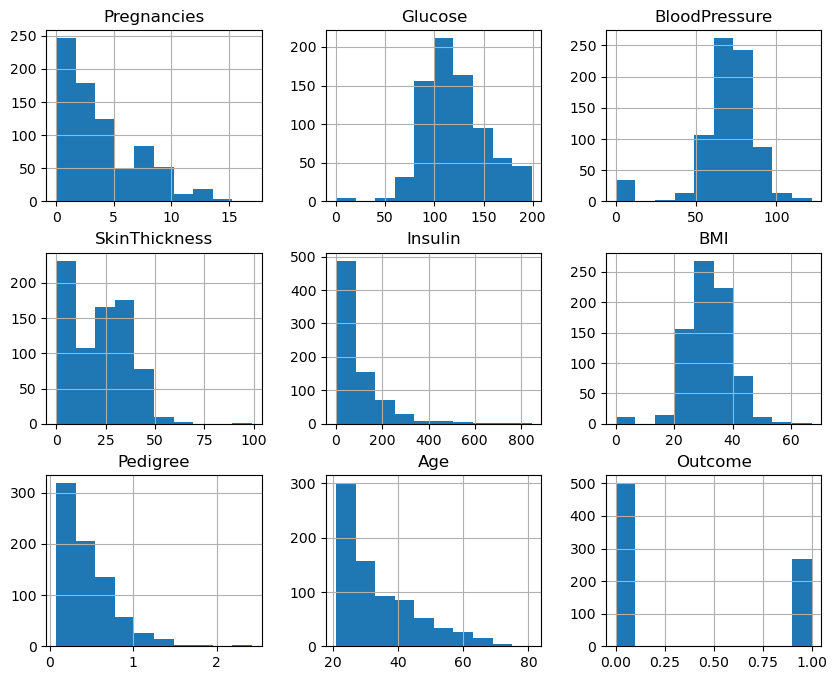

In [10]:
# veamos la distribución de los datos mediante histogramas 
data.hist(figsize=(10, 8))
plt.show()

Dado que todas las variables son númericas, procedemos a realizar la división de los datos.

In [11]:
# importar la biblioteca para dividir los datos
from sklearn.model_selection import train_test_split

Creamos los conjuntos de entrenamientio (train) y prueba (test) para las variable "X" que son el conjunto de variables independientes e "y" que es la variable dependiente.

In [13]:
# creamos el conjunto de las variables independientes (X) solo eliminando la variable objetivo
X = data.drop(['Outcome'], axis=1)
# variable "y" o variable objetivo
y = data['Outcome']

In [14]:
# ahora dividimos las variables X e y en los conjuntos de entrenamiento y prueba con una proporción de 20% para prueba, 
# además aplicamos el parámetro random_state para una posible replica de la práctica
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# imprimimos las formasd de los datos
print("Número de filas y columnas del conjunto de entrenamiento:", X_train.shape, y_train.shape)

print("Número de filas y columnas del conjunto de prueba:", X_test.shape, y_test.shape)

Número de filas y columnas del conjunto de entrenamiento: (614, 8) (614,)
Número de filas y columnas del conjunto de prueba: (154, 8) (154,)


Con los datos dividos, procedemos a implementar el modelo, lo primero es importar la bibliotecas necesarias. 

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# instanciamos el modelo con el criterio de entropía y máxima profundidad en 4
DecTreeClass = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
DecTreeClass

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
# momento de entrenar el modelo 
DecTreeClass.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Lo siguiente será realizar la predicción con el modelo ya entrenado.

In [24]:
y_pred_tree = DecTreeClass.predict(X_test)

Podemos hacer una impresión comparativa de los valores predichos vs los valores reales.

In [30]:
print("Valores predichos:", y_pred_tree[0:15])
print("-----------------------------------------------------------------")
print("Valores reales:", list(y_test[0:15]))

Valores predichos: [1 0 0 0 0 1 0 1 1 1 1 1 1 1 0]
-----------------------------------------------------------------
Valores reales: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]


De acuerdo con lo anterior, no parece que nuestro modelo arroje muy buenos resultados, pero para corroborar evaluemos el mismo con algunas métricas.

In [31]:
# importarmos las métricas
from sklearn import metrics

In [37]:
print("Precisión del modelo:", round(metrics.accuracy_score(y_test, y_pred_tree), 3))

Precisión del modelo: 0.714


Tenemos una precisión del 71.4%. Veamos otras métricas de evaluaciópn, mismas que se explican enseguida.

In [33]:
print("Matriz de confusión:\n", metrics.confusion_matrix(y_test, y_pred_tree))

Matriz de confusión:
 [[65 34]
 [10 45]]


In [35]:
print("Reporte de clasificación:\n\n", metrics.classification_report(y_test, y_pred_tree))

Reporte de clasificación:

               precision    recall  f1-score   support

           0       0.87      0.66      0.75        99
           1       0.57      0.82      0.67        55

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.71      0.72       154



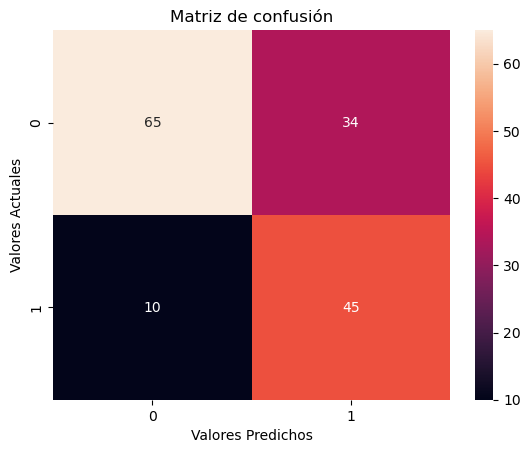

In [38]:
# realizamos un gráfico con seaborn de la matriz de confusión
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_tree), annot=True, cbar=True)
plt.xlabel("Valores Predichos")
plt.ylabel("Valores Actuales")
plt.title("Matriz de confusión")

plt.show()

La **matriz de confusión** es una herramienta fundamental para evaluar el rendimiento de un modelo de clasificación. Es una tabla que permite visualizar las predicciones correctas e incorrectas realizadas por el modelo, desglosadas por cada clase.

En una matriz de confusión de 2x2 para un problema de clasificación binaria, las filas representan las clases reales y las columnas las clases predichas. Los elementos de la matriz son:

- **True Positive (TP) o Verdaderos Positivos**: Predicciones correctas de la clase positiva.

- **True Negative (TN) o Verdaderos Negativos**: Predicciones correctas de la clase negativa.

- **False Positive (FP) o Falsos Positivos**: Predicciones incorrectas de la clase positiva (error de tipo I).

- **False Negative (FN) o Falsos Negativos**: Predicciones incorrectas de la clase negativa (error de tipo II).

**Reporte de clasificación:**

Las métricas que nos retorna el reporte de clasificación se explican a continuación:

- **Accuracy (Exactitud):** Proporción de predicciones correctas.
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precision (Precisión):** Proporción de verdaderos positivos entre todas las predicciones positivas.
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall (Sensibilidad) o Tasa de Verdaderos Positivos:** Proporción de verdaderos positivos entre todas las instancias reales positivas.
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **Specificity (Especificidad):** Proporción de verdaderos negativos entre todas las instancias reales negativas.
  $$
  \text{Specificity} = \frac{TN}{TN + FP}
  $$

In [51]:
from sklearn.tree import export_graphviz

In [81]:
import pydotplus
from IPython.display import Image
import graphviz

In [82]:
export_graphviz(DecTreeClass, 
                out_file='../Images/tree.dot', 
                filled=True, 
                feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age'], 
                class_names=['0', '1'], 
                special_characters=True
               )
#!dot -Tpng tree.dot -o dec_tree.png

In [80]:
print("__________________________________________")

__________________________________________


In [75]:
import pydotplus
from IPython.display import Image

In [73]:
# Exportar el árbol de decisión a formato dot 
dot_data = export_graphviz(DecTreeClass, 
                          out_file=None, 
                          feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age'], 
                          class_names=['0', '1'], 
                          filled=True, 
                          special_characters=True
                          )

# Visualizar el árbol
graph = pydotplus.graph_from_dot_data(dot_data)
#graph = graphviz.Source(dot_data)
#graph.render("../Images/decision_tree_pdf")
graph.write_png("../Images//DecTreeClass.png")
Image(graph.create_png())
#!dot -Tpng DecTreeClass.dot -o DecTreeClass.png

InvocationException: GraphViz's executables not found

In [79]:
# Exportar el árbol de decisión a formato dot 
dot_data = export_graphviz(DecTreeClass, 
                          out_file=None, 
                          feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age'], 
                          class_names=['0', '1'], 
                          filled=True, 
                          special_characters=True
                          )

# Convertir el archivo DOT a PNG
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("../Images/arbol_decision.png")

# Mostrar la imagen
Image(graph.create_png())

InvocationException: GraphViz's executables not found